In [5]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\data\proecessed\cleaned_brent_oil.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Compute daily percentage change
df["Price Change (%)"] = df["Price"].pct_change() * 100

# Compute moving averages
df["SMA_7"] = df["Price"].rolling(window=7).mean()  # 7-day simple moving average
df["SMA_30"] = df["Price"].rolling(window=30).mean()  # 30-day moving average

# Compute volatility (rolling standard deviation)
df["Volatility_7"] = df["Price"].rolling(window=7).std()  # 7-day rolling volatility
df["Volatility_30"] = df["Price"].rolling(window=30).std()  # 30-day rolling volatility

# Drop NaN values caused by rolling calculations
df.dropna(inplace=True)

# Save feature-engineered dataset
df.to_csv("brent_oil_features.csv")

# Display sample data
print(df.head())

print("✅ Feature Engineering Completed!")


            Price  Price Change (%)      SMA_7     SMA_30  Volatility_7  \
Date                                                                      
1987-07-01  18.98         -0.524109  18.948571  18.789667      0.173054   
1987-07-02  19.25          1.422550  18.998571  18.810333      0.204404   
1987-07-03  19.33          0.415584  19.081429  18.839667      0.204404   
1987-07-06  19.48          0.775996  19.192857  18.870667      0.171825   
1987-07-07  19.50          0.102669  19.252857  18.900667      0.197291   

            Volatility_30  
Date                       
1987-07-01       0.194803  
1987-07-02       0.209605  
1987-07-03       0.218813  
1987-07-06       0.241103  
1987-07-07       0.261401  
✅ Feature Engineering Completed!


c:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\.venv\Lib\site-packages\st

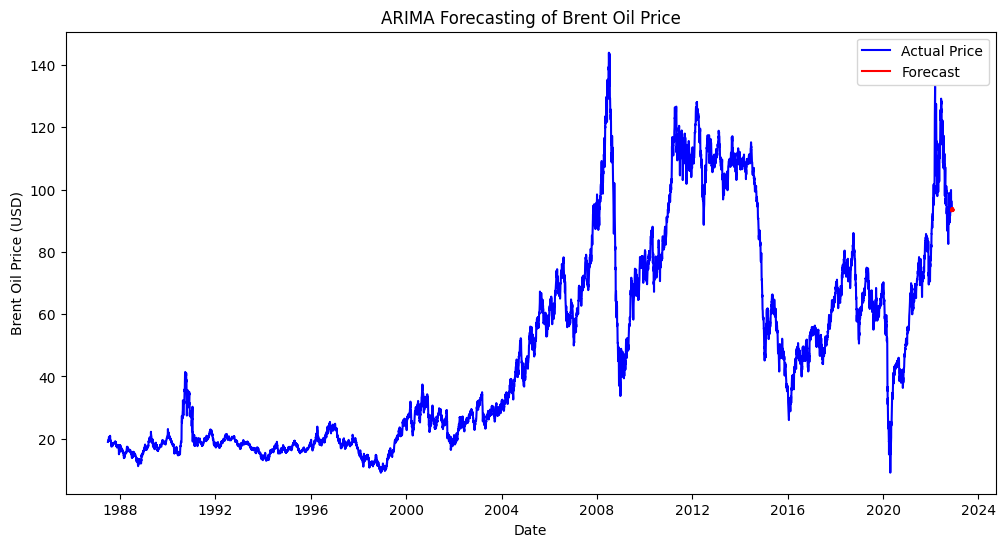

✅ ARIMA Forecasting Completed!


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (Auto ARIMA can be used for better parameter selection)
model = ARIMA(df["Price"], order=(5,1,2))
arima_result = model.fit()

# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Price"], label="Actual Price", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Brent Oil Price (USD)")
plt.title("ARIMA Forecasting of Brent Oil Price")
plt.legend()
plt.show()

print("✅ ARIMA Forecasting Completed!")


c:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:40:10 - cmdstanpy - INFO - Chain [1] start processing
23:40:19 - cmdstanpy - INFO - Chain [1] done processing


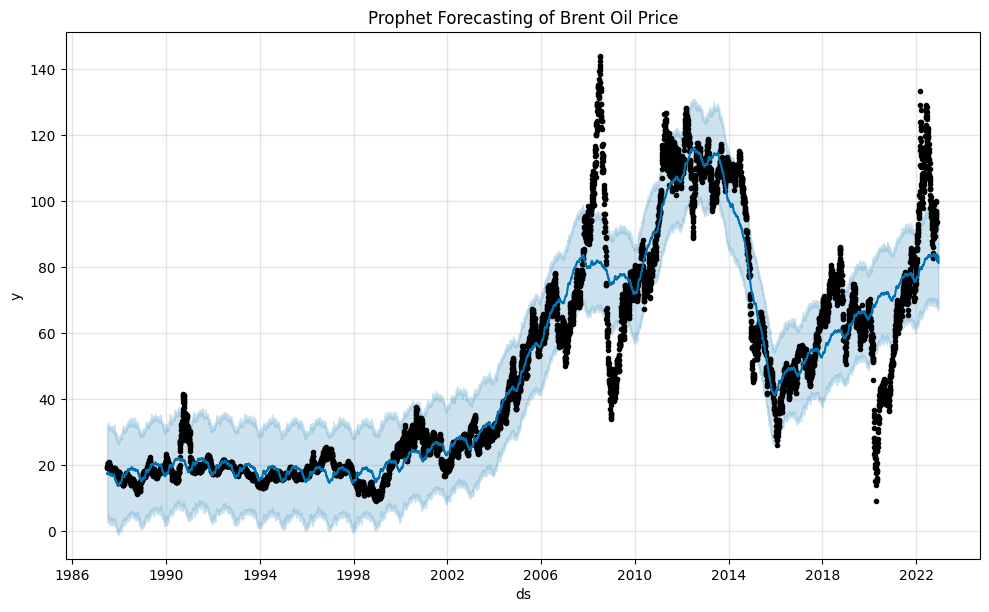

✅ Prophet Forecasting Completed!


In [8]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()[["Date", "Price"]]
prophet_df.columns = ["ds", "y"]  # Rename columns for Prophet

# Fit Prophet model
model = Prophet()
model.fit(prophet_df)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict 30 days ahead
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Prophet Forecasting of Brent Oil Price")
plt.show()

print("✅ Prophet Forecasting Completed!")


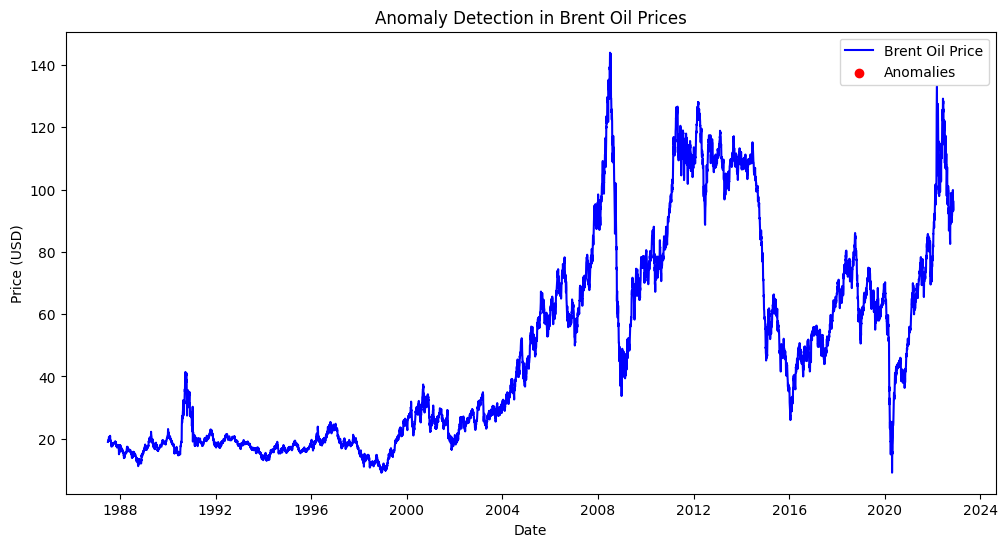

✅ Anomaly Detection Completed!


In [9]:
from scipy.stats import zscore

# Compute Z-Scores
df["Z-Score"] = zscore(df["Price"])

# Mark anomalies where Z-Score is above threshold (e.g., 3)
df["Anomaly"] = df["Z-Score"].apply(lambda x: 1 if abs(x) > 3 else 0)

# Plot anomalies
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Price"], label="Brent Oil Price", color="blue")
plt.scatter(df.index[df["Anomaly"] == 1], df["Price"][df["Anomaly"] == 1], color="red", label="Anomalies", marker="o")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Anomaly Detection in Brent Oil Prices")
plt.legend()
plt.show()

print("✅ Anomaly Detection Completed!")
